Moving Average:
$$ X_t = \mu + \varepsilon_t + \sum_{i=1}^q \theta_i \varepsilon_{t-i} $$

Auto-Regressive:
$$ X_t = c + \sum_{i=1}^p \varphi_i X_{t-i} + \varepsilon_t $$

Auto-Regressive Moving Average:
$$ X_t = \sum_{i=1}^p \varphi_i X_{t-i} + \varepsilon_t + \sum_{i=1}^q \theta_i \varepsilon_{t-i} $$

Auto-Regressive Integrated Moving Average:
<br>
<br>
From ARMA,
$$ X_t - \sum_{i=1}^{p^{\prime}} \varphi_i X_{t-i} = \varepsilon_t + \sum_{i=1}^q \theta_i \varepsilon_{t-i} $$
Let
$$ L^{i}X_t = X_{t-i}, i = 1, 2, 3... $$
and
$$ L^{i}\varepsilon_t = \varepsilon_{t-i}, i = 1, 2, 3... $$
then
$$ X_t - \sum_{i=1}^{p^{\prime}} \varphi_i L^{i}X_t = \varepsilon_t + \sum_{i=1}^q \theta_i L^{i}\varepsilon_t $$

$$ \left(1 - \sum_{i=1}^{p^{\prime}} \varphi_i L^{i}\right)X_t = \left(1 + \sum_{i=1}^q \theta_i L^{i}\right)\varepsilon_t $$

Assume that
$$ \left(1 - \sum_{i=1}^{p^{\prime}} \varphi_i L^{i}\right) = \left(1 - \sum_{i=1}^{p^{\prime} - d} \alpha_i L^{i}\right)(1 - L)^{d} $$

then
$$ \left(1 - \sum_{i=1}^{p} \alpha_i L^{i}\right)(1 - L)^{d}X_t = \left(1 + \sum_{i=1}^q \theta_i L^{i}\right)\varepsilon_t $$

where
$$ p = p^{\prime} - d \quad (\text{d integration}) $$

In [26]:
import datetime as dt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [34]:
start = dt.datetime(2019, 1, 1)
end = dt.datetime(2020, 7, 28)
data = web.DataReader("BTC-USD", "yahoo", start, end)

In [35]:
print(data.head())

                   High          Low         Open        Close      Volume  \
Date                                                                         
2019-01-01  3850.913818  3707.231201  3746.713379  3843.520020  4324200990   
2019-01-02  3947.981201  3817.409424  3849.216309  3943.409424  5244856835   
2019-01-03  3935.685059  3826.222900  3931.048584  3836.741211  4530215218   
2019-01-04  3865.934570  3783.853760  3832.040039  3857.717529  4847965467   
2019-01-05  3904.903076  3836.900146  3851.973877  3845.194580  5137609823   

              Adj Close  
Date                     
2019-01-01  3843.520020  
2019-01-02  3943.409424  
2019-01-03  3836.741211  
2019-01-04  3857.717529  
2019-01-05  3845.194580  


Text(0.5, 1.0, 'BTC Autocorrelation plot')

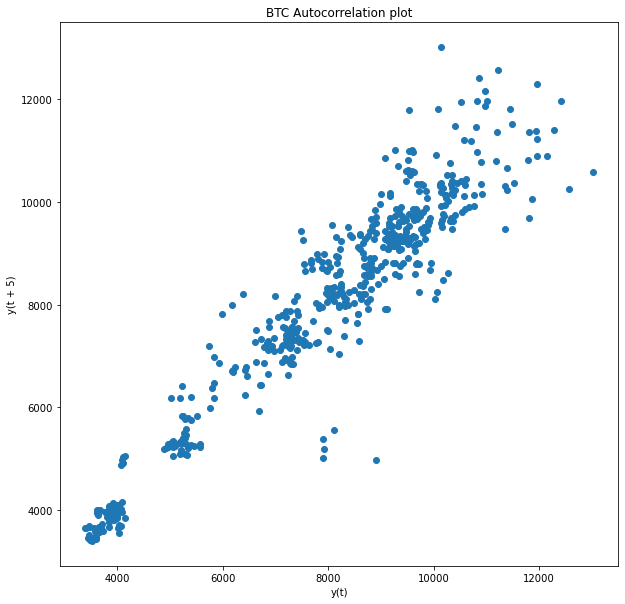

In [36]:
plt.figure(figsize=(10,10))
lag_plot(data['Close'], lag=5)
plt.title('BTC Autocorrelation plot')

In [37]:
df = pd.DataFrame(data, columns=["Close", "Volume"])
df = df.reset_index()
train = df[df["Date"] < "2020-01-01"]
test = df[df["Date"] >= "2020-01-01"]

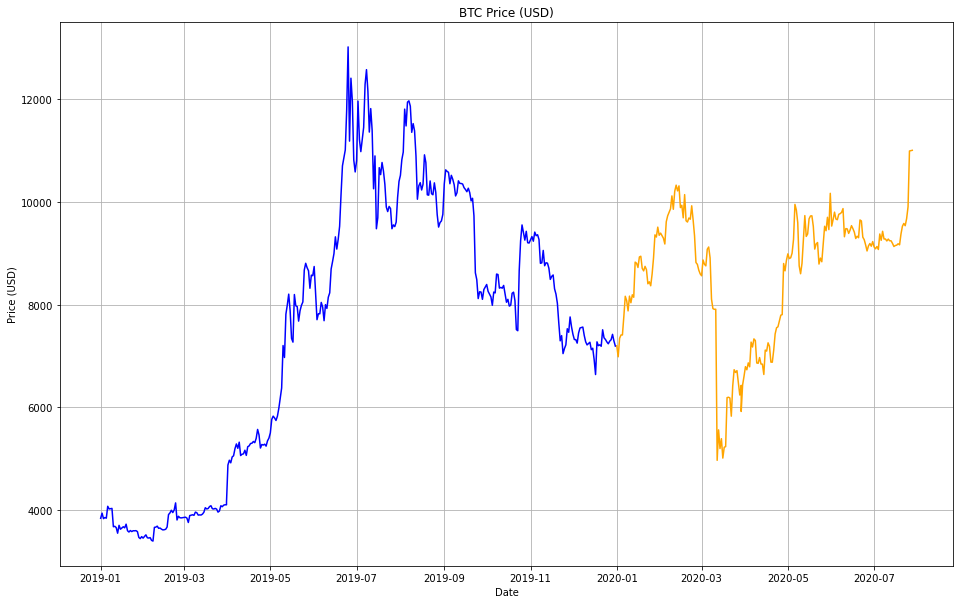

In [38]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.plot(train['Date'], train['Close'], 'blue', label = 'Train data')
plt.plot(test['Date'], test['Close'], 'orange', label = 'Test data')
plt.title('BTC Price (USD)')
plt.show()

In [39]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [40]:
train_ar = train['Close'].values
test_ar = test['Close'].values
history = [x for x in train_ar]

In [41]:
predictions = []
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

c:\program files\python38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Testing Mean Squared Error: 115883.732
Symmetric mean absolute percentage error: 16.739


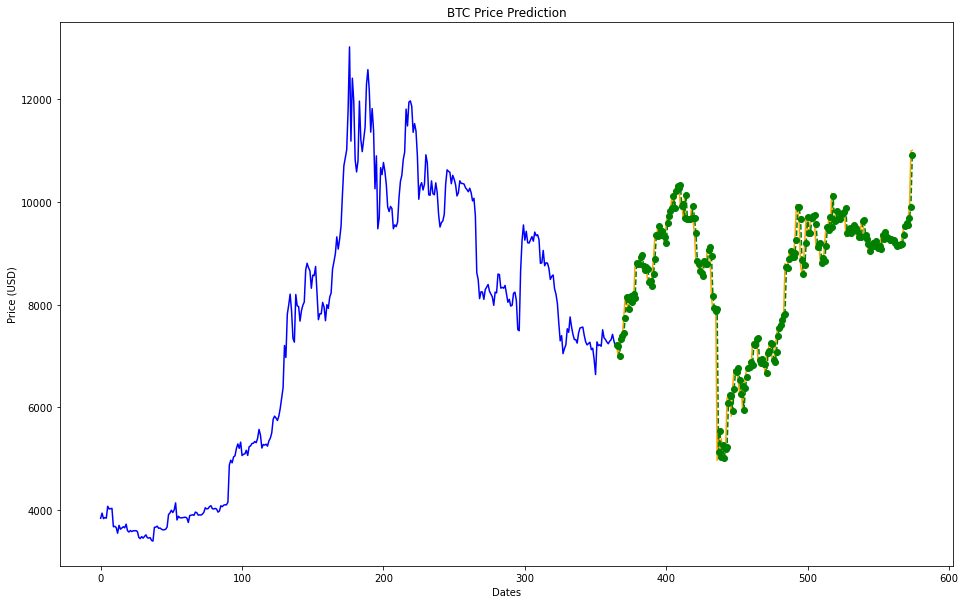

In [44]:
plt.figure(figsize=(16,10))
plt.plot(train.index, train['Close'], 'green', color='blue', label='Training Data')
plt.plot(test.index, test['Close'], color='orange', label='Actual Price')
plt.plot(test.index, predictions, color='green', marker='o', linestyle='dashed', label='Predicted Price')
plt.title('BTC Price Prediction')
plt.xlabel('Dates')
plt.ylabel('Price (USD)')
plt.show()